<a href="https://colab.research.google.com/github/JayaKrishnaVamsi/Vamsi/blob/master/Waste%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
image_path = "/content/drive/My Drive/R_6.jpg"
#import tensorflow as tf

def loadImages(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([os.path.join(path, 'train', file)
                          for file in os.listdir(path + "/train")
                          if file.endswith('.png')])
    return image_files
    

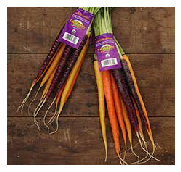

In [15]:
img = open_image('/content/drive/My Drive/DATASET/TEST/O/O_12573.jpg')
img.show()

In [16]:
learn.predict(img)

(Category O, tensor(0), tensor([0.6279, 0.3721]))

Classes: 
 ['O', 'R']


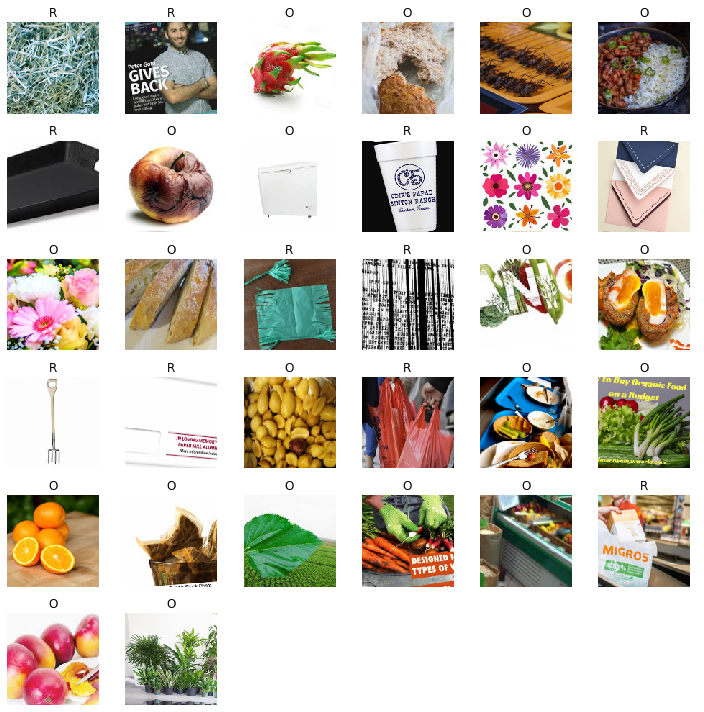

In [5]:
data = ImageDataBunch.from_folder(
    path,
    train = "TRAIN",
    valid = "TEST",
    ds_tfms=get_transforms(do_flip=False),
    size = 128,
    bs=32,
    valid_pct=0.2,
    num_workers=0
).normalize(imagenet_stats)
print(f'Classes: \n {data.classes}')
data.show_batch(rows=10,figsize=(10,10))

In [4]:
path = Path('/content/drive/My Drive/DATASET')
path.ls()

[PosixPath('/content/drive/My Drive/DATASET/TEST'),
 PosixPath('/content/drive/My Drive/DATASET/TRAIN'),
 PosixPath('/content/drive/My Drive/DATASET/.DS_Store')]

In [0]:
from fastai import *
from fastai.vision import *

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 65.5MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


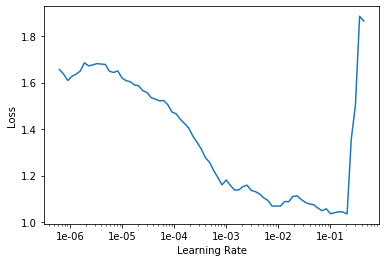

In [6]:
learn = create_cnn(data, models.resnet50,metrics=accuracy,model_dir='/tmp/model/')
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save('model1')

Learner(data=ImageDataBunch;

Train: LabelList (20071 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
R,R,R,R,R
Path: /content/drive/My Drive/DATASET;

Valid: LabelList (5017 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
O,R,R,R,R
Path: /content/drive/My Drive/DATASET;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

In [7]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,0.237421,0.209996,0.925852,3:05:19
1,0.226731,0.150740,0.942197,05:20
2,0.157660,0.133048,0.953159,05:18
3,0.153756,0.119308,0.955750,05:16
4,0.134707,0.114297,0.957544,05:17
5,0.122097,0.109602,0.960335,05:15
